Summary Statistics:
          Item1     Item2    Item3
count  4.000000  4.000000  4.00000
mean   2.750000  2.750000  2.00000
std    2.217356  2.217356  2.44949
min    0.000000  0.000000  0.00000
25%    1.500000  1.500000  0.00000
50%    3.000000  3.000000  1.50000
75%    4.250000  4.250000  3.50000
max    5.000000  5.000000  5.00000

Missing Values:
Item1    0
Item2    0
Item3    0
dtype: int64


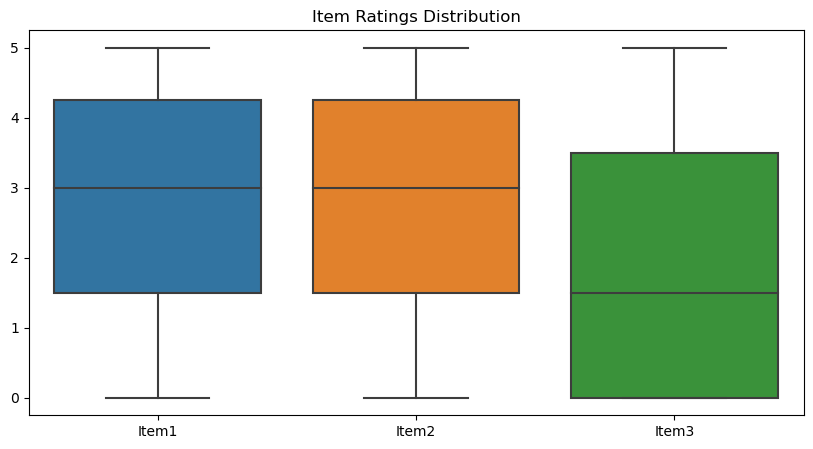


User-Based Collaborative Filtering - Recommendations for User1:
Item1    3.0
Item2    3.0
Item3    2.5
dtype: float64

Item-Based Collaborative Filtering - Recommendations for Item1:
User
User4    4.5
User3    2.5
User1    1.5
User2    1.0
dtype: float64


In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'User': ['User1', 'User2', 'User3', 'User4'],
    'Item1': [5, 4, 0, 2],
    'Item2': [0, 2, 5, 4],
    'Item3': [3, 0, 0, 5],
}
df = pd.DataFrame(data)
df.set_index('User', inplace=True)

print("Summary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title('Item Ratings Distribution')
plt.show()

user_similarity = cosine_similarity(df)
user_similarity_df = pd.DataFrame(user_similarity, index=df.index, columns=df.index)

def get_user_recommendations(user, top_n=2):
    similar_users = user_similarity_df[user].sort_values(ascending=False).index[1:top_n+1]
    recommended_items = df.loc[similar_users].mean(axis=0).sort_values(ascending=False)
    return recommended_items

user1_recommendations = get_user_recommendations('User1')
print("\nUser-Based Collaborative Filtering - Recommendations for User1:")
print(user1_recommendations)

item_similarity = cosine_similarity(df.T)
item_similarity_df = pd.DataFrame(item_similarity, index=df.columns, columns=df.columns)

def get_item_recommendations(item, top_n=2):
    similar_items = item_similarity_df[item].sort_values(ascending=False).index[1:top_n+1]
    recommended_items = df[similar_items].mean(axis=1).sort_values(ascending=False)
    return recommended_items

item1_recommendations = get_item_recommendations('Item1')
print("\nItem-Based Collaborative Filtering - Recommendations for Item1:")
print(item1_recommendations)
